# Predict Ad Clicks

In [406]:
# Import Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
import seaborn as sns

In [407]:
# Set dataframe and plot options
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option("display.max_columns", 101)
plt.rcParams ['font.size'] = 14

## Data Wrangling & Visualization

In [408]:
data = pd.read_csv("train.csv")
data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked
0,1200,2016-01-01 02:52:10,80.670,34,"58,909.360",239.760,Seamless impactful info-mediaries,0,Portugal,0
1,1201,2016-01-01 03:35:35,68.010,25,"68,357.960",188.320,Ameliorated actuating workforce,1,Afghanistan,0
2,1202,2016-01-01 05:31:22,80.940,36,"60,803.000",239.940,Self-enabling local strategy,0,Bermuda,0
3,1203,2016-01-01 08:27:06,78.770,28,"63,497.620",211.830,Public-key intangible Graphical User Interface,0,Guam,0
4,1204,2016-01-01 15:14:24,36.560,29,"42,838.290",195.890,Team-oriented bi-directional secured line,0,Uganda,1


In [409]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   Timestamp                 1000 non-null   object 
 2   Daily Time Spent on Site  1000 non-null   float64
 3   Age                       1000 non-null   int64  
 4   Area Income               775 non-null    float64
 5   Daily Internet Usage      1000 non-null   float64
 6   Ad Topic Line             1000 non-null   object 
 7   gender                    1000 non-null   int64  
 8   Country                   1000 non-null   object 
 9   Clicked                   1000 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB


In [410]:
data.describe()

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,gender,Clicked
count,"1,000.000","1,000.000","1,000.000",775.000,"1,000.000","1,000.000","1,000.000"
mean,"1,699.500",65.121,35.816,"55,343.015",179.592,0.474,0.503
std,288.819,15.781,8.783,"13,182.579",43.736,0.500,0.500
min,"1,200.000",32.600,19.000,"14,548.060",105.000,0.000,0.000
25%,"1,449.750",51.450,29.000,"48,270.620",137.885,0.000,0.000
50%,"1,699.500",68.390,35.000,"57,737.510",182.425,0.000,1.000
75%,"1,949.250",78.572,41.250,"65,207.185",217.708,1.000,1.000
max,"2,199.000",91.370,61.000,"79,484.800",269.960,1.000,1.000


## Visualizations

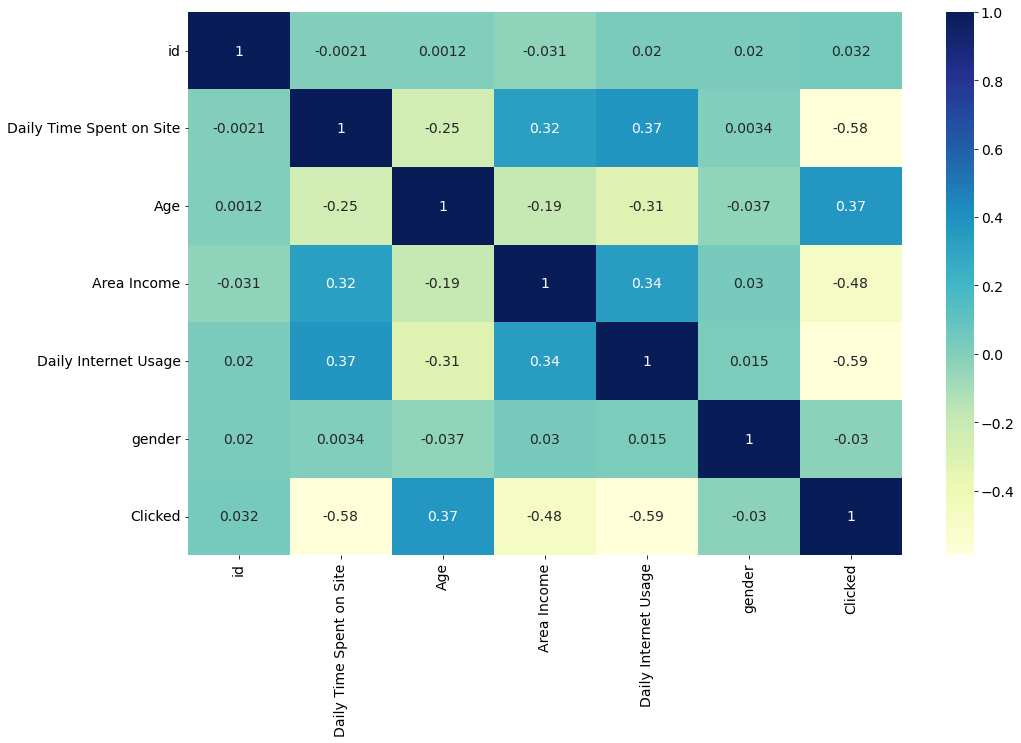

In [411]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")
plt.show()

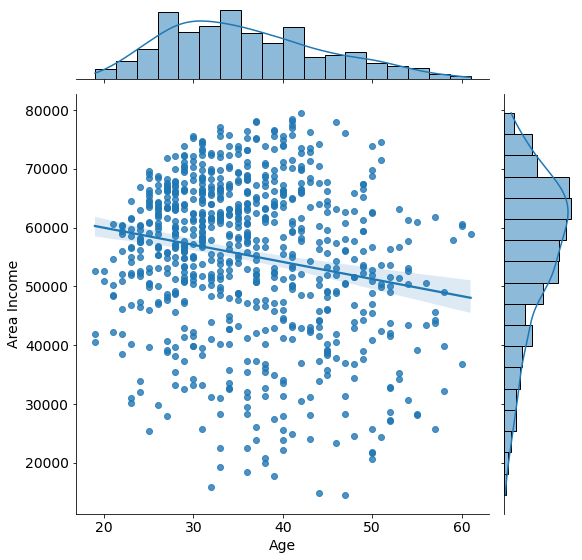

In [412]:
sns.jointplot(x = 'Age', y= 'Area Income', data = data, kind = 'reg', height = 8);
plt.show()

<Figure size 576x360 with 0 Axes>

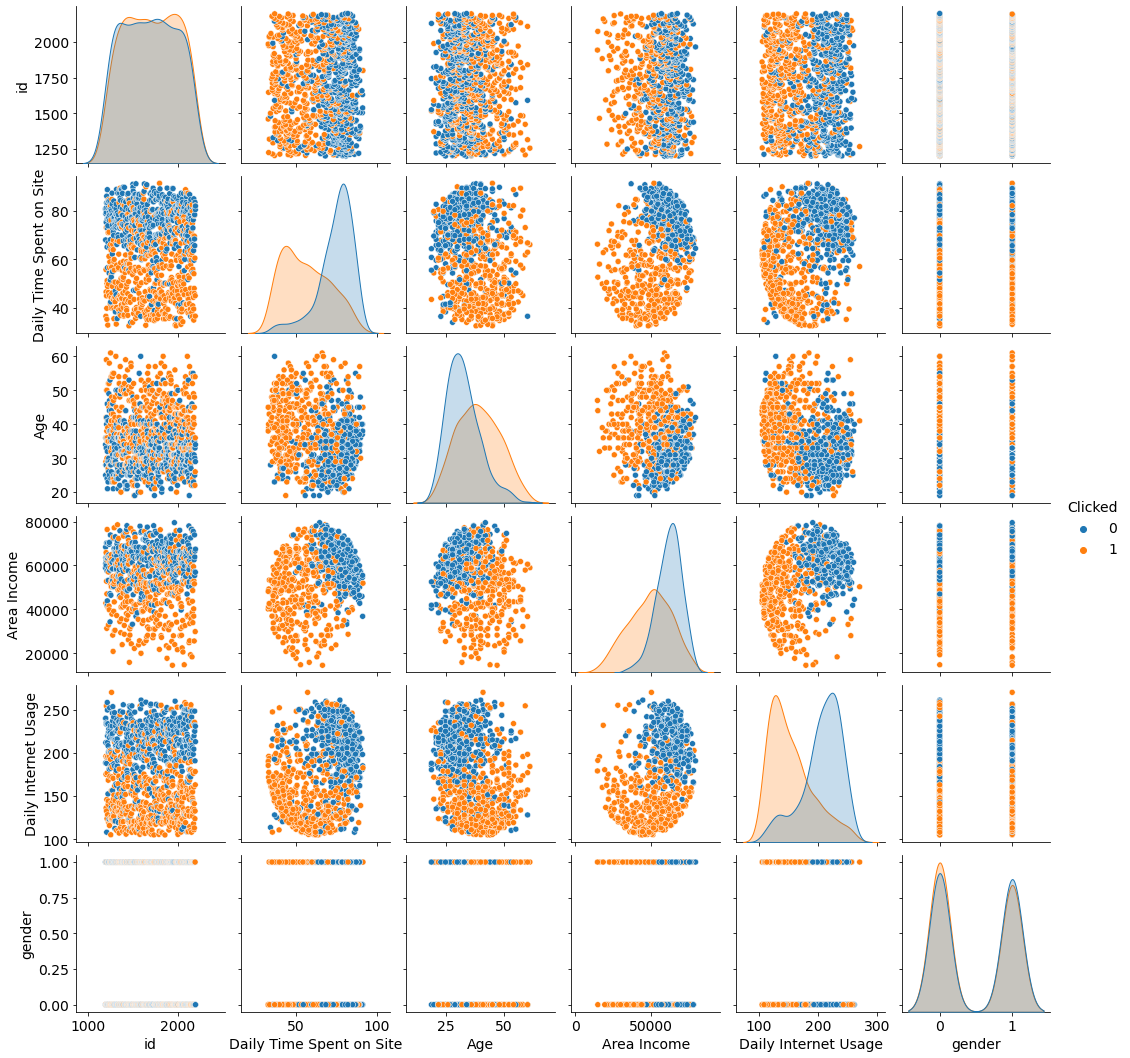

In [413]:
plt.figure(figsize = (8, 5))
sns.pairplot(data, hue = 'Clicked')
plt.show()

## Machine Learning Modeling
#### Predict which users might click a particular advertisement. Models are evaluated based on accuracy

In [414]:
#Load Test data
test_data = pd.read_csv('test.csv')
test_data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country
0,2200,2016-06-04 17:24:07,43.880,54,"31,523.090",166.850,Enhanced methodical database,1,Somalia
1,2201,2016-06-05 00:29:13,66.400,40,"77,567.850",214.420,Digitized heuristic solution,0,Antigua and Barbuda
2,2202,2016-06-05 00:29:13,79.520,34,NaN,141.580,Customer-focused 24/7 concept,0,United States of America
3,2203,2016-06-05 07:54:30,52.350,25,"33,293.780",147.610,Mandatory 4thgeneration structure,1,Mali
4,2204,2016-06-05 07:54:30,81.510,36,NaN,195.930,Monitored local Internet solution,0,Croatia


In [415]:
#find null values
print(data.isnull().sum(axis = 0))
print(test_data.isnull().sum(axis = 0))

id                            0
Timestamp                     0
Daily Time Spent on Site      0
Age                           0
Area Income                 225
Daily Internet Usage          0
Ad Topic Line                 0
gender                        0
Country                       0
Clicked                       0
dtype: int64
id                           0
Timestamp                    0
Daily Time Spent on Site     0
Age                          0
Area Income                 75
Daily Internet Usage         0
Ad Topic Line                0
gender                       0
Country                      0
dtype: int64


In [416]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   Timestamp                 1000 non-null   object 
 2   Daily Time Spent on Site  1000 non-null   float64
 3   Age                       1000 non-null   int64  
 4   Area Income               775 non-null    float64
 5   Daily Internet Usage      1000 non-null   float64
 6   Ad Topic Line             1000 non-null   object 
 7   gender                    1000 non-null   int64  
 8   Country                   1000 non-null   object 
 9   Clicked                   1000 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB


In [417]:
# parse timestamp
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Day'] = data['Timestamp'].dt.weekday
data['Hour'] = data['Timestamp'].dt.hour

# fill in null values
data['Area Income'].fillna(-1, inplace=True)

#drop id TimeStamp
data=data.drop(columns = ['id', 'Timestamp'])

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked,Day,Hour
0,80.670,34,"58,909.360",239.760,Seamless impactful info-mediaries,0,Portugal,0,4,2
1,68.010,25,"68,357.960",188.320,Ameliorated actuating workforce,1,Afghanistan,0,4,3
2,80.940,36,"60,803.000",239.940,Self-enabling local strategy,0,Bermuda,0,4,5
3,78.770,28,"63,497.620",211.830,Public-key intangible Graphical User Interface,0,Guam,0,4,8
4,36.560,29,"42,838.290",195.890,Team-oriented bi-directional secured line,0,Uganda,1,4,15


In [418]:
#convert to object type
data=data.astype('object')

In [419]:
#do same for test set
test_data['Timestamp'] = pd.to_datetime(test_data['Timestamp'])
test_data['Day'] = test_data['Timestamp'].dt.weekday
test_data['Hour'] = test_data['Timestamp'].dt.hour

# fill in null values
test_data['Area Income'].fillna(-1, inplace=True)

#drop TimeStamp
test_data=test_data.drop(columns = ['Timestamp'])

test_data.head()

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Day,Hour
0,2200,43.880,54,"31,523.090",166.850,Enhanced methodical database,1,Somalia,5,17
1,2201,66.400,40,"77,567.850",214.420,Digitized heuristic solution,0,Antigua and Barbuda,6,0
2,2202,79.520,34,-1.000,141.580,Customer-focused 24/7 concept,0,United States of America,6,0
3,2203,52.350,25,"33,293.780",147.610,Mandatory 4thgeneration structure,1,Mali,6,7
4,2204,81.510,36,-1.000,195.930,Monitored local Internet solution,0,Croatia,6,7


In [420]:
#convert to object
test_data = test_data.astype('object')

In [421]:
#Feature encoding from non-numerical to numerical

for col in test_data.columns[1:]:
    label = LabelEncoder()
    label.fit(list(data[col].values) + list(test_data[col].values))
    data[col] = label.transform(list(data[col].values))
    test_data[col] = label.transform(list(test_data[col].values))

test_data.head(10)

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Day,Hour
0,2200,135,35,71,402,227,1,194,5,17
1,2201,420,21,993,697,191,0,8,6,0
2,2202,702,15,0,259,136,0,226,6,0
3,2203,239,6,86,289,448,1,129,6,7
4,2204,761,17,0,557,463,0,51,6,7
5,2205,842,10,417,663,14,0,183,6,13
6,2206,319,0,215,568,113,1,116,6,21
7,2207,18,13,352,589,575,0,218,6,22
8,2208,501,5,748,465,612,1,2,0,21
9,2209,534,25,0,945,212,1,125,0,21


In [422]:
#Create training and model testing dataset splits 80% train / 20% test (from test dataset).
y = data['Clicked'].astype('int64')
x = data.drop(columns = ['Clicked'])

#split into random train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

### Evaluate accuracy of different ML models

In [423]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
LG_model = LogisticRegression(random_state = 1, max_iter=500)
LG_model.fit(x_train, y_train)
LG_predictions = LG_model.predict(x_test)
print(accuracy_score(y_test,LG_predictions))

0.82


In [424]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, max_depth = 12, random_state = 1)
RF_model.fit(x_train, y_train)
RF_predictions = RF_model.predict(x_test)
print(accuracy_score(y_test,RF_predictions))

0.84


In [425]:
# MLP Neural Network
from sklearn.neural_network import MLPClassifier
MLP_model = MLPClassifier(random_state = 1, max_iter=500)
MLP_model.fit(x_train, y_train)
MLP_predictions = MLP_model.predict(x_test)
print(accuracy_score(y_test,MLP_predictions))

0.82


In [426]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB as GNB
GNB_model = GNB()
GNB_model.fit(x_train, y_train)
GNB_predictions = GNB_model.predict(x_test)
print(accuracy_score(y_test,GNB_predictions))

0.815


In [427]:
# Support Vector Machine
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(x_train, y_train)
SVM_predictions = SVM_model.predict(x_test)
print(accuracy_score(y_test,SVM_predictions))

0.855


In [428]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier as KNN
KNN_model = KNN(n_neighbors = 3)
KNN_model.fit(x_train, y_train)
KNN_predictions = KNN_model.predict(x_test)
print(accuracy_score(y_test,KNN_predictions))

0.85


## Visualize the top 10 features and their feature importance


In [429]:
# Mutual information measures the dependency between each variable and the target that is being predicted
# It is equal to zero if variables are independent, values greater than zero indicate dependency.
mutual_info = pd.Series(mutual_info_classif(x_train, y_train))
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending = False)

Daily Time Spent on Site   0.202
Daily Internet Usage       0.193
Area Income                0.084
Age                        0.080
Ad Topic Line              0.033
Hour                       0.006
gender                     0.000
Country                    0.000
Day                        0.000
dtype: float64

<AxesSubplot:>

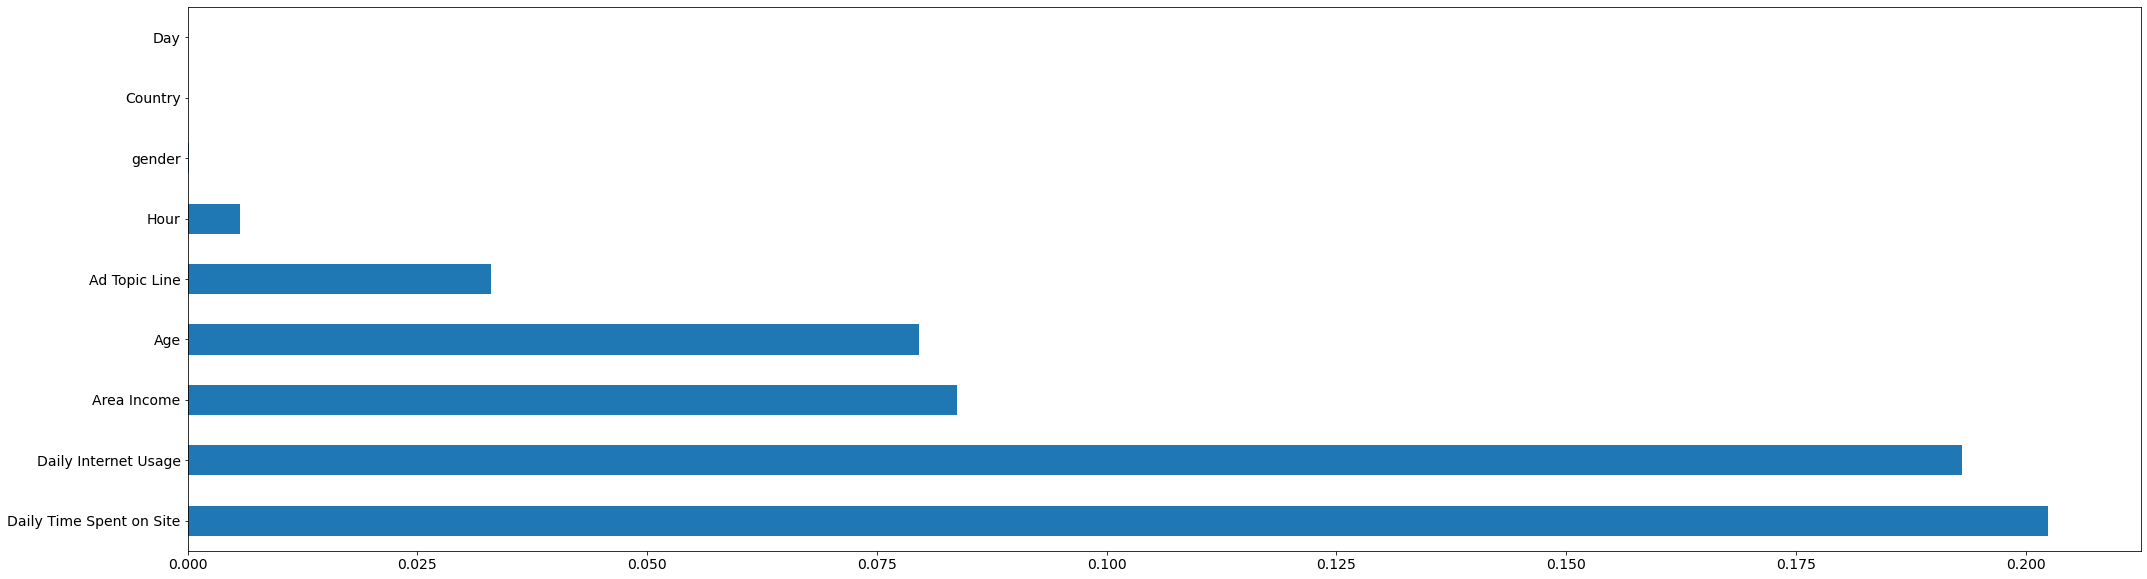

In [430]:
mutual_info.sort_values(ascending = False).plot.barh(figsize = (35,10))

## Predictions on the test dataset
### For each record in the test set (`test.csv`), predict whether a consumer clicked on an ad or not.

In [431]:
test_data.head()

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Day,Hour
0,2200,135,35,71,402,227,1,194,5,17
1,2201,420,21,993,697,191,0,8,6,0
2,2202,702,15,0,259,136,0,226,6,0
3,2203,239,6,86,289,448,1,129,6,7
4,2204,761,17,0,557,463,0,51,6,7


In [432]:
# Generate final predictions from most accurate ML model
# test data is indexed a 1 because test_data has id column but train data dropped it
test_predictions = RF_model.predict(test_data[test_data.columns[1:]])

In [433]:
# Prepare predictions dataframe for submsision
submission = pd.DataFrame({'id':test_data['id'],\
                    'Daily Time Spent on Site':test_data['Daily Time Spent on Site'],\
                    'Age':test_data['Age'],\
                    'Area Income':test_data['Area Income'],\
                    'Daily Internet Usage':test_data['Daily Internet Usage'],\
                    'Ad Topic Line':test_data['Ad Topic Line'],\
                    'Country':test_data['Country'],\
                    'Day':test_data['Day'],\
                    'Hour':test_data['Hour'],\
                    'Prediction':test_predictions})
submission.head(10)

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Country,Day,Hour,Prediction
0,2200,135,35,71,402,227,194,5,17,1
1,2201,420,21,993,697,191,8,6,0,0
2,2202,702,15,0,259,136,226,6,0,1
3,2203,239,6,86,289,448,129,6,7,1
4,2204,761,17,0,557,463,51,6,7,1
5,2205,842,10,417,663,14,183,6,13,0
6,2206,319,0,215,568,113,116,6,21,0
7,2207,18,13,352,589,575,218,6,22,1
8,2208,501,5,748,465,612,2,0,21,0
9,2209,534,25,0,945,212,125,0,21,0


In [434]:
#Submission
submission.to_csv('submission.csv', index = False)

---